In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from jupyter_dash import JupyterDash

In [2]:
# Carregar datasets
df_world = pd.read_csv("worldometer_data.csv")
df_day = pd.read_csv("day_wise.csv")

Shape: (209, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), o

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


,Country/Region,TotalCases
0,USA,5032179
1,Brazil,2917562
2,India,2025409
3,Russia,871894
4,South Africa,538184
5,Mexico,462690
6,Peru,455409
7,Chile,366671
8,Colombia,357710
9,Spain,354530


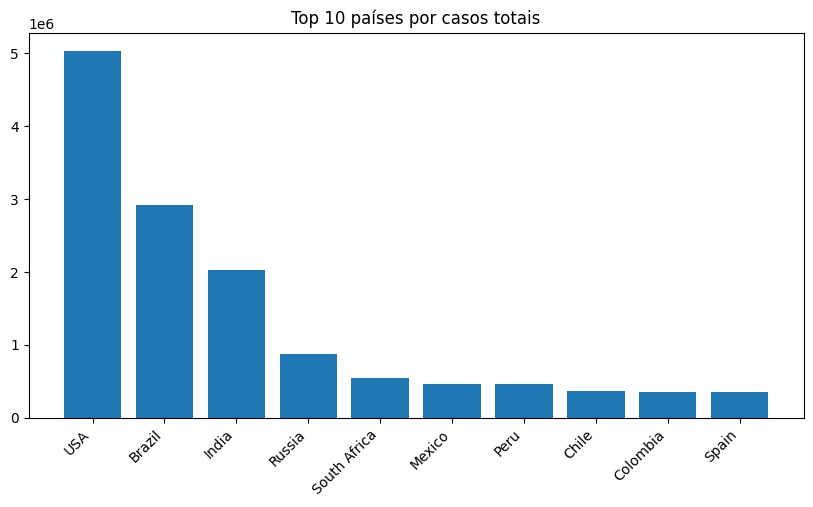

In [3]:
# Informações básicas
print("Shape:", df_world.shape)
print(df_world.info())

# Valores ausentes
print("\nValores ausentes por coluna:")
print(df_world.isna().sum())

# Estatísticas descritivas
display(df_world.describe())

# Visualizar primeiras linhas
display(df_world.head())

# Top 10 países por casos totais
if "TotalCases" in df_world.columns:
    top10 = df_world.sort_values("TotalCases", ascending=False).head(10)
    display(top10[["Country/Region", "TotalCases"]])

    plt.figure(figsize=(10,5))
    plt.bar(top10["Country/Region"], top10["TotalCases"])
    plt.xticks(rotation=45, ha="right")
    plt.title("Top 10 países por casos totais")
    plt.show()

In [4]:
# Top 10 países
if "TotalCases" in df_world.columns:
    top10 = df_world.sort_values("TotalCases", ascending=False).head(10)
    fig = px.bar(top10, x="Country/Region", y="TotalCases",
                 title="Top 10 países por casos totais (interativo)")
    fig.show() 

# Série temporal global de novos casos
if "date" in df_day.columns and "new_cases" in df_day.columns:
    df_day["date"] = pd.to_datetime(df_day["date"])

    fig = px.line(df_day, x="date", y="new_cases",
                  title="Novos casos globais por dia")
    fig.show()


In [5]:
import plotly.io as pio

if "date" in df_day.columns and "Country" in df_day.columns:
    df_day["date"] = pd.to_datetime(df_day["date"])
    sample_countries = df_day["Country"].unique()[:5]
    print("Países selecionados:", sample_countries)

    df_filtered = df_day[df_day["Country"].isin(sample_countries)]
    print("Shape do df_filtered:", df_filtered.shape)

    if not df_filtered.empty:
        fig = px.line(df_filtered, x="date", y="new_cases", color="Country",
                      title=" amostragem de novos casos por país ")
        fig.show()  
    else:
        print("Nenhum dado encontrado para os países selecionados.")


In [6]:
#Top 5 países por total de mortes
if "TotalDeaths" in df_world.columns and "Country/Region" in df_world.columns:
    top5_deaths = df_world.sort_values("TotalDeaths", ascending=False).head(5)
    
    fig = px.bar(top5_deaths, 
                 x="Country/Region", 
                 y="TotalDeaths", 
                 title="Top 5 países por total de mortes",
                 text="TotalDeaths")
    fig.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig.show()
else:
    print("Colunas não encontradas para se ter a plotagem deste grafico.")

In [7]:
import pandas as pd
import plotly.express as px

dia = pd.read_csv("day_wise.csv")

dia["Date"] = pd.to_datetime(dia["Date"])

fig = px.line(dia, x="Date", y="New cases",
              title="Novos casos globais por dia")
fig.show()

fig2 = px.line(dia, x="Date", y="Confirmed",
               title="Casos confirmados acumulados no mundo")
fig2.show()


In [8]:
paises = pd.read_csv("country_wise_latest.csv")

top10casos = paises.sort_values("Confirmed", ascending=False).head(10)

fig = px.bar(top10casos, x="Country/Region", y="Confirmed",
             title="Top 10 países por casos confirmados")
fig.show()

paises["Fatality Rate (%)"] = (paises["Deaths"] / paises["Confirmed"]) * 100

top10_fatality = paises.sort_values("Fatality Rate (%)", ascending=False).head(10)

fig2 = px.bar(top10_fatality, x="Country/Region", y="Fatality Rate (%)",
              title="Top 10 países por taxa de letalidade")
fig2.show()


In [9]:
globo = pd.read_csv("full_grouped.csv")
globo["Date"] = pd.to_datetime(globo["Date"])

# Selecionar países para comparar
selecao = ["Brazil", "India", "United States", "Italy", "Spain"]

filtrados = globo[globo["Country/Region"].isin(selecao)]

fig = px.line(filtrados, x="Date", y="Confirmed", color="Country/Region",
              title="Evolução dos casos confirmados em países selecionados")
fig.show()

selecao_new = ["Brazil", "India", "United States", "Italy", "Spain"]

filtrados_new = globo[globo["Country/Region"].isin(selecao)]

fig2 = px.line(filtrados, x="Date", y="New cases", color="Country/Region",
               title="Novos casos por dia em países selecionados")
fig2.show()


In [10]:
df_usa = pd.read_csv("usa_county_wise.csv")

CasosporEstado = df_usa.groupby("Province_State")["Confirmed"].sum().reset_index()

fig = px.bar(CasosporEstado.sort_values("Confirmed", ascending=False).head(15),
             x="Province_State", y="Confirmed",
             title="Top 15 estados dos EUA por casos confirmados")
fig.show()


In [11]:
df_world = pd.read_csv("worldometer_data.csv")

fig = px.scatter(df_world, x="Population", y="TotalCases",
                 size="TotalCases", color="Continent",
                 hover_name="Country/Region", log_x=True,
                 title="Casos totais vs População (escala log)")
fig.show()


In [ ]:
import threading, webbrowser, os

# Função para abrir navegador
def open_browser():
    webbrowser.open("http://localhost:8501")

# Abrir navegador automaticamente
threading.Timer(1, open_browser).start()

# Executar o streamlit
os.system("streamlit run dashboard.py --server.headless true")